In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import category_encoders as ce
import seaborn as sns

In [2]:
data = 'weatherAUS_train.csv'
df = pd.read_csv(data)
df.shape

(101822, 23)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0


In [4]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].isnull().sum()

Date              0
Location          0
WindGustDir    7318
WindDir9am     7391
WindDir3pm     2986
RainToday      2300
dtype: int64

In [5]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
for var in categorical: 
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3408  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)

In [7]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']
df[numerical].isnull().sum()

MinTemp           1027
MaxTemp            875
Rainfall          2300
Evaporation      43889
Sunshine         48800
WindGustSpeed     7272
WindSpeed9am      1272
WindSpeed3pm      2159
Humidity9am       1854
Humidity3pm       3160
Pressure9am      10554
Pressure3pm      10518
Cloud9am         38989
Cloud3pm         41420
Temp9am           1226
Temp3pm           2518
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [13]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  100795.0  100947.0   99522.0      57933.0   53022.0        94550.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        32.0      48.0     368.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      100550.0       99663.0      99968.0      98662.0      91268.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindGustSpeed')

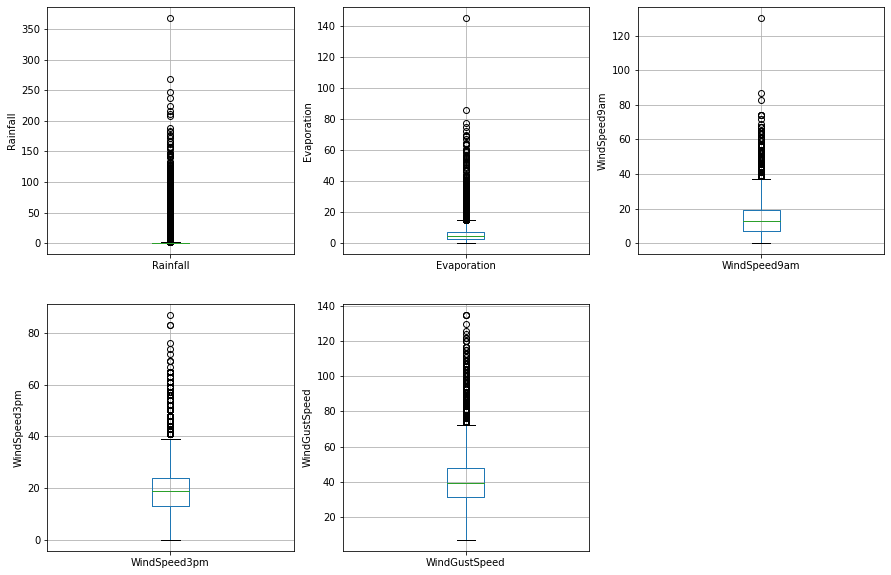

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 3, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 3, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 3, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'RainTomorrow')

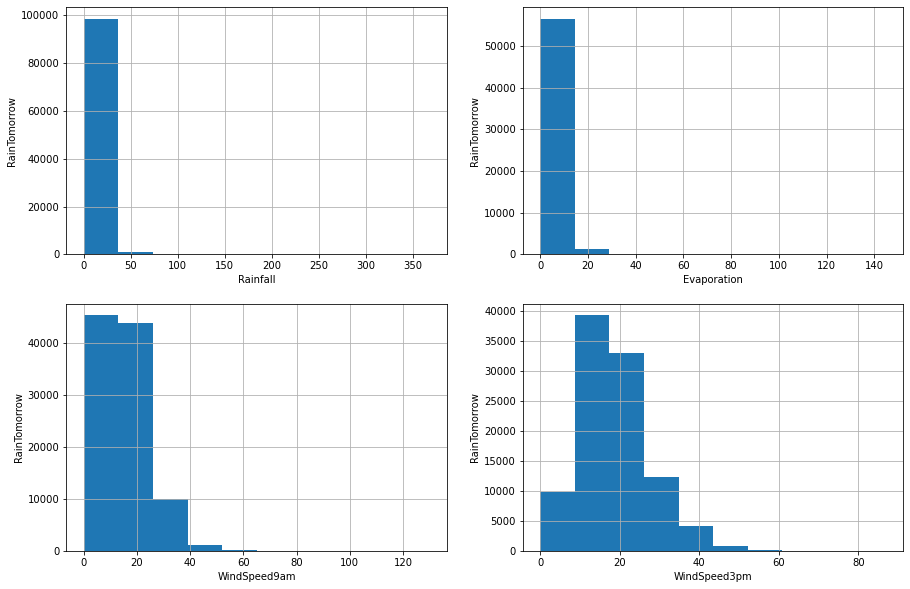

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [16]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [17]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)    
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

<ipython-input-18-72f85cf95647>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
<ipython-input-18-72f85cf95647>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
<ipython-input-18-72f85cf95647>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [19]:
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [20]:
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [22]:
y_pred_test = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8496


In [23]:
y_pred_train = logreg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8490


In [24]:
cm = confusion_matrix(y_test, y_pred_test)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

True Positives(TP) =  15151
True Negatives(TN) =  2152
False Positives(FP) =  823
False Negatives(FN) =  2239


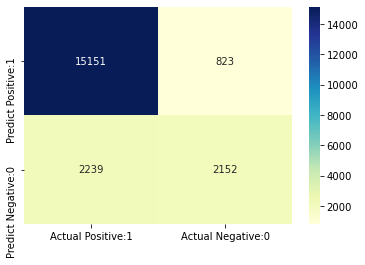

In [25]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
data2 = 'weatherAUS_test.csv'
dft = pd.read_csv(data2)

In [27]:
dft['Date'] = pd.to_datetime(dft['Date'])
dft['Year'] = dft['Date'].dt.year
dft['Month'] = dft['Date'].dt.month
dft['Day'] = dft['Date'].dt.day
dft.drop('Date', axis=1, inplace = True)

In [28]:
categorical = [var for var in dft.columns if dft[var].dtype=='O']
dft[categorical].isnull().sum()

Location          0
WindGustDir    3008
WindDir9am     3175
WindDir3pm     1242
RainToday       961
dtype: int64

In [29]:
numerical = [var for var in dft.columns if dft[var].dtype!='O']
dft[numerical].isnull().sum()

Id                   0
MinTemp            458
MaxTemp            386
Rainfall           961
Evaporation      18901
Sunshine         21035
WindGustSpeed     2991
WindSpeed9am       495
WindSpeed3pm       903
Humidity9am        800
Humidity3pm       1347
Pressure9am       4511
Pressure3pm       4510
Cloud9am         16899
Cloud3pm         17938
Temp9am            541
Temp3pm           1091
Year                 0
Month                0
Day                  0
dtype: int64

In [30]:
for df1 in [dft]:
    for col in numerical:
        col_median = dft[col].median()
        df1[col].fillna(col_median, inplace=True)    
for df2 in [dft]:
    df2['WindGustDir'].fillna(dft['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(dft['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(dft['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(dft['RainToday'].mode()[0], inplace=True)

In [31]:
dft.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,0,Sale,7.6,28.1,0.0,4.6,8.5,W,39.0,WNW,...,1012.8,1009.1,5.0,5.0,14.2,27.5,No,2016,4,5
1,1,Tuggeranong,17.0,28.9,0.0,4.6,8.5,E,33.0,N,...,1024.7,1020.5,5.0,5.0,18.9,27.7,No,2015,2,10
2,2,SydneyAirport,18.6,22.7,0.0,6.8,5.5,SSW,37.0,SW,...,1018.6,1017.0,7.0,6.0,20.3,21.2,No,2011,12,21
3,3,Katherine,23.0,31.5,13.0,3.2,8.5,W,57.0,NW,...,1003.1,999.6,8.0,5.0,24.0,21.1,Yes,2016,12,31
4,4,GoldCoast,18.7,26.1,0.0,4.6,8.5,E,26.0,E,...,1017.0,1014.0,5.0,5.0,23.4,23.5,No,2010,10,27


In [32]:
encoder = ce.BinaryEncoder(cols=['RainToday'])
dft = encoder.fit_transform(dft)
dft = pd.concat([dft[numerical], dft[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(dft.Location), 
                     pd.get_dummies(dft.WindGustDir),
                     pd.get_dummies(dft.WindDir9am),
                     pd.get_dummies(dft.WindDir3pm)], axis=1)

In [34]:
test = dft.drop(['Id'], axis=1)

In [35]:
cols = test.columns
test = scaler.fit_transform(test)
test = pd.DataFrame(test, columns=[cols])

In [36]:
res = logreg.predict(test)

In [48]:
ans = pd.DataFrame(np.array([dft['Id'], res]).T, columns=[['Id', 'RainTomorrow']])
ans.head()

,Id,RainTomorrow
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [45]:
ans.to_csv('Gason_task_2.csv')